- OpenClassrooms Project 5, Data Scientist
- Author : Oumeima EL GHARBI
- Date : September, October 2022

## Part III : Predictive maintenance of clustering

In this last notebook, we want to determine the number of days the segmentation predicted is stable (meaning the number of days the clustering predicts correctly the different clusters).

We will create different datasets from T0 to Tn where Tn will be the dataset will all the data / customers.
We will fit/predict at each period T a new clustering and we will predict a clustering using the kmeans used at T0.

We will compare these two clustering at T using the ARI score and a Confusion Matrix.

The aim is to determine the number of days / weeks the segmentation is well predicted by the initial clustering.

- We made two simulations
- Simulation 1 : over 9 months, every 15 days.
- Simulation 2 : over 3 months, every 7 days.


### Importing libraries

In [1]:
import pandas as pd
%reset -f

from simulation_functions import *
from functions import *
from graphing_functions import *

import pickle

# to compute time of pipeline
from time import time, strftime, gmtime

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [2]:
# Starting time
t0 = time()

input_path = "./dataset/cleaned/"
input_filename = "merged_dataset.csv"

simulation_path = "./dataset/simulation/"
experiment_1_path = simulation_path + "/experiment_1/"
experiment_2_path = simulation_path + "/experiment_2/"

### Importing dataset

In [3]:
data = load_data(input_path, input_filename)

___Loading raw dataset___
Initial shape : (112650, 18)


In [4]:
data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


## I) Preparing simulation datasets

##### This section below is not cleaned to detail the process

##### In the section II, we create the simulation datasets and run the simulation

In [5]:
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'].astype(str), format='%Y/%m/%d') # .astype(str)

In [6]:
last_day_recorded = data["order_purchase_timestamp"].max()

print("Last day recorded in the dataset :", last_day_recorded, type(last_day_recorded))

print("Year :", last_day_recorded.year)
print("Month :", last_day_recorded.month)
print("Day :", last_day_recorded.day)

Last day recorded in the dataset : 2018-09-03 09:06:57 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Year : 2018
Month : 9
Day : 3


In [7]:
nb_days = 15

In [8]:
# Time limit
time_limit = max(data.order_purchase_timestamp) + relativedelta(days=-nb_days)

time_limit

Timestamp('2018-08-19 09:06:57')

In [9]:
data_previous_days = data.copy()
filter_date = data_previous_days["order_purchase_timestamp"] <= time_limit

data_previous_days = data_previous_days[filter_date]
print("Verification of the filter :", max(data_previous_days.order_purchase_timestamp))

Verification of the filter : 2018-08-19 08:57:45


In [10]:
data_previous_days = data_previous_days.groupby('customer_unique_id').agg({'order_purchase_timestamp' : lambda x: (time_limit - x.max()).days,
                                           'order_id' : pd.Series.nunique,
                                           'price' : 'sum',
                                           })
# Rename columns
dataset_rfm_previous_days = data_previous_days.rename(columns = {'order_purchase_timestamp' : 'Recency',
                                   'order_id' : 'Frequency',
                                   'price' : 'Monetary'}) #, inplace = True)

In [11]:
dataset_rfm_previous_days

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,100,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,103,1,18.90
0000f46a3911fa3c0805444483337064,526,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,310,1,25.99
0004aac84e0df4da2b147fca70cf8255,277,1,180.00
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,436,1,1570.00
fffea47cd6d3cc0a88bd621562a9d061,251,1,64.89
ffff371b4d645b6ecea244b27531430a,557,1,89.90


## II) Simulation

In [12]:
nb_clusters = 4
print("We will run all the experiments with K =", nb_clusters)

We will run all the experiments with K = 4


### 1) Experiment 1 : simulation over 9 months

####

In [13]:
nb_periods_exp_1 = 17
nb_days_exp_1 = 15

In [14]:
simulate_dataset(data, nb_days=nb_days_exp_1, nb_periods=nb_periods_exp_1, output_path=experiment_1_path, experiment_nb=1)




Step : 1 Maximum order purchase date : 2017-12-22 09:06:57
Verification of the filter : 2017-12-22 09:06:20
This dataset has 42415 unique clients



Step : 2 Maximum order purchase date : 2018-01-06 09:06:57
Verification of the filter : 2018-01-06 09:03:41
This dataset has 44483 unique clients



Step : 3 Maximum order purchase date : 2018-01-21 09:06:57
Verification of the filter : 2018-01-21 09:03:17
This dataset has 48074 unique clients



Step : 4 Maximum order purchase date : 2018-02-05 09:06:57
Verification of the filter : 2018-02-05 09:06:12
This dataset has 51346 unique clients



Step : 5 Maximum order purchase date : 2018-02-20 09:06:57
Verification of the filter : 2018-02-20 09:05:49
This dataset has 54669 unique clients



Step : 6 Maximum order purchase date : 2018-03-07 09:06:57
Verification of the filter : 2018-03-07 09:02:41
This dataset has 58414 unique clients



Step : 7 Maximum order purchase date : 2018-03-22 09:06:57
Verification of the filter : 2018-03-22 08:4

In [15]:
X_T0 = pd.read_csv(experiment_1_path + "rfm_T0.csv").drop("customer_unique_id", axis=1).copy()

In [16]:
X_T0.shape

(42415, 3)

In [17]:
scaler_exp_1 = StandardScaler().fit(X_T0[X_T0.columns])

X_std_T0 = X_T0.copy()
X_std_T0[X_std_T0.columns] = scaler_exp_1.transform(X_std_T0[X_std_T0.columns])
print(X_std_T0.shape)

X_std_T0.head()

(42415, 3)


,Recency,Frequency,Monetary
0,1.568474,-0.160436,-0.327221
1,-0.646025,-0.160436,-0.516989
2,-0.984351,-0.160436,0.162531
3,1.629988,-0.160436,-0.036017
4,0.235674,-0.160436,-0.570333


##### We save the StandardScaler used to fit the dataset at T0

In [18]:
# Saving clustering model
model = {'scaler_T0': scaler_exp_1}
filename = './model/simulation/experiment_{}/scaler_T0.pkl'.format("1")
with open(filename, "wb") as f: # wb writing
    pickle.dump(model, f)

##### PCA

In [19]:
from sklearn.decomposition import PCA

pca_T0 = PCA(n_components=2, random_state=0)
pca_T0.fit(X_std_T0)
print(pca_T0.explained_variance_ratio_.cumsum())

X_pca_T0 = pca_T0.transform(X_std_T0)

[0.3645731  0.69904393]


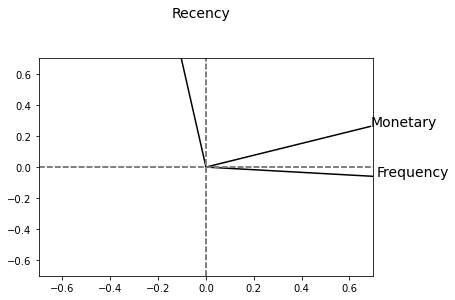

In [20]:
display_pca_components(pca_fit=pca_T0, X_norm=X_std_T0)

##### K-Means with K = 4

In [21]:
from sklearn.cluster import KMeans

kmeans_cls_T0 = KMeans(n_clusters=nb_clusters, verbose=0, random_state=0)
kmeans_cls_T0.fit(X_std_T0)

KMeans(n_clusters=4, random_state=0)

Text(0.5, 1.0, 'Visualizing clusters with PCA')

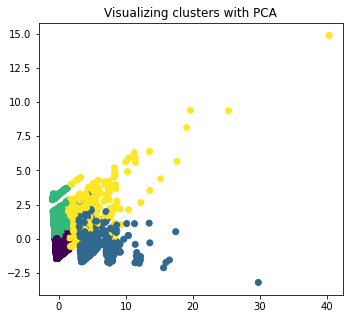

In [22]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_pca_T0[:, 0], y=X_pca_T0[:, 1], c=kmeans_cls_T0.labels_) # colorier en fct etiquette deu clusterning
plt.title("Visualizing clusters with PCA")

##### T1 = T0 + 15 days

In [23]:
X_T1 = pd.read_csv(experiment_1_path + "/rfm_T1.csv").drop("customer_unique_id", axis=1).copy()

In [24]:
print("Predicting new clusters")

X_std_T1 = X_T1.copy()
scaler = StandardScaler()

X_std_T1[X_std_T1.columns] = scaler.fit_transform(X_std_T1)
print(X_std_T1.shape)

kmeans_cls_T1_new = KMeans(n_clusters=4, verbose=0, random_state=0)
kmeans_cls_T1_new.fit(X_std_T1)

Predicting new clusters
(44483, 3)


KMeans(n_clusters=4, random_state=0)

In [25]:
print("Using the initial K-Means to predict clusters")

scaler_filename = './model/simulation/experiment_{}/scaler_T0.pkl'.format("1")
with open(scaler_filename, 'rb') as f:
    scaler_T0 = pickle.load(f)

scaler_T0["scaler_T0"]

Using the initial K-Means to predict clusters


StandardScaler()

In [26]:
X_std_T1_scaler_T0 = X_T1.copy()
X_std_T1_scaler_T0[X_std_T1_scaler_T0.columns] = scaler_T0["scaler_T0"].transform(X_std_T1_scaler_T0[X_std_T1_scaler_T0.columns])

X_std_T1_scaler_T0

,Recency,Frequency,Monetary
0,1.722259,-0.160436,-0.327221
1,-0.492241,-0.160436,-0.516989
2,-0.830567,-0.160436,0.162531
3,1.783773,-0.160436,-0.036017
4,0.389458,-0.160436,-0.570333
...,...,...,...
44478,-1.271416,-0.160436,0.025754
44479,0.799551,-0.160436,6.295468
44480,-1.097127,-0.160436,-0.345355
44481,2.040080,-0.160436,-0.235007


In [27]:
kmeans_cls_T1_init = kmeans_cls_T0.predict(X_std_T1_scaler_T0)

In [28]:
kmeans_cls_T1_new.labels_[:5]

array([1, 0, 0, 1, 1])

In [29]:
kmeans_cls_T1_init[:5]

array([2, 0, 0, 2, 2])

In [30]:
ARI_T1 = adjusted_rand_score(kmeans_cls_T1_init, kmeans_cls_T1_new.labels_) # Y true labels / pred labels
ARI_T1

0.9010417486451141

##### We display the confusion matrix between the prediction at T1 using the clustering from T0 and the clustering from T0

In [31]:
confusion(y_true=kmeans_cls_T1_init, y_pred=kmeans_cls_T1_new.labels_)

,pred_0,pred_1,pred_2,pred_3
true_0,24033,0,9,0
true_1,0,0,0,1249
true_2,1170,16995,25,0
true_3,0,0,1002,0


#### 2) Evaluate ARI for all T (all periods)

In [32]:
simulation_results_exp_1 = pd.DataFrame({})

simulation_results_exp_1 = run_simulation(nb_periods=nb_periods_exp_1, kmeans_cls_T0=kmeans_cls_T0, results=simulation_results_exp_1, experiment_nb=1, nb_clusters=nb_clusters)




For T = 1
(44483, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 1


,T,ARI
0,1,0.901042


,pred_0,pred_1,pred_2,pred_3
true_0,24033,0,9,0
true_1,0,0,0,1249
true_2,1170,16995,25,0
true_3,0,0,1002,0





For T = 2
(48074, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 2


,T,ARI
0,1,0.901042
1,2,0.872430


,pred_0,pred_1,pred_2,pred_3
true_0,0,25539,0,38
true_1,0,0,1359,1
true_2,18389,1622,0,49
true_3,0,0,0,1077





For T = 3
(51346, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 3


,T,ARI
0,1,0.901042
1,2,0.872430
2,3,0.835567


,pred_0,pred_1,pred_2,pred_3
true_0,26854,0,72,0
true_1,0,0,2,1464
true_2,2238,19499,87,0
true_3,0,0,1130,0





For T = 4
(54669, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 4


,T,ARI
0,1,0.901042
1,2,0.872430
2,3,0.835567
3,4,0.756864


,pred_0,pred_1,pred_2,pred_3
true_0,27774,0,0,243
true_1,0,0,1589,2
true_2,3513,20174,0,201
true_3,0,0,0,1173





For T = 5
(58414, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 5


,T,ARI
0,1,0.901042
1,2,0.872430
2,3,0.835567
3,4,0.756864
4,5,0.724575


,pred_0,pred_1,pred_2,pred_3
true_0,0,29492,0,237
true_1,0,0,1731,4
true_2,21127,4346,0,233
true_3,0,0,0,1244





For T = 6
(61879, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 6


,T,ARI
0,1,0.901042
1,2,0.872430
2,3,0.835567
3,4,0.756864
4,5,0.724575
5,6,0.672223


,pred_0,pred_1,pred_2,pred_3
true_0,0,30673,0,234
true_1,0,0,1839,4
true_2,21904,5643,0,271
true_3,0,0,0,1311





For T = 7
(65121, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 7


,T,ARI
0,1,0.901042
1,2,0.872430
2,3,0.835567
3,4,0.756864
4,5,0.724575
5,6,0.672223
6,7,0.663626


,pred_0,pred_1,pred_2,pred_3
true_0,31932,209,0,0
true_1,0,4,0,1927
true_2,6125,315,23235,0
true_3,0,1374,0,0





For T = 8
(68407, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 8


,T,ARI
0,1,0.901042
1,2,0.872430
2,3,0.835567
3,4,0.756864
4,5,0.724575
5,6,0.672223
6,7,0.663626
7,8,0.606990


,pred_0,pred_1,pred_2,pred_3
true_0,32528,0,0,195
true_1,0,0,2025,4
true_2,7771,24098,0,318
true_3,0,0,0,1468





For T = 9
(71881, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 9


,T,ARI
0,1,0.901042
1,2,0.872430
2,3,0.835567
3,4,0.756864
4,5,0.724575
5,6,0.672223
6,7,0.663626
7,8,0.606990
8,9,0.467983


,pred_0,pred_1,pred_2,pred_3
true_0,0,30807,158,0
true_1,0,0,3,2127
true_2,24983,11937,342,0
true_3,0,0,1524,0





For T = 10
(75772, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 10


,T,ARI
0,1,0.901042
1,2,0.872430
2,3,0.835567
3,4,0.756864
4,5,0.724575
5,6,0.672223
6,7,0.663626
7,8,0.606990
8,9,0.467983
9,10,0.439050


,pred_0,pred_1,pred_2,pred_3
true_0,0,31854,0,147
true_1,0,0,2247,4
true_2,26020,13524,0,351
true_3,0,0,0,1625





For T = 11
(77917, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 11


,T,ARI
0,1,0.901042
1,2,0.872430
2,3,0.835567
3,4,0.756864
4,5,0.724575
5,6,0.672223
6,7,0.663626
7,8,0.606990
8,9,0.467983
9,10,0.439050


,pred_0,pred_1,pred_2,pred_3
true_0,31910,0,0,116
true_1,0,2335,0,4
true_2,14820,0,26681,380
true_3,0,0,0,1671





For T = 12
(81013, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 12


,T,ARI
0,1,0.901042
1,2,0.872430
2,3,0.835567
3,4,0.756864
4,5,0.724575
5,6,0.672223
6,7,0.663626
7,8,0.606990
8,9,0.467983
9,10,0.439050


,pred_0,pred_1,pred_2,pred_3
true_0,31443,0,106,0
true_1,0,0,5,2434
true_2,17235,27632,410,0
true_3,0,0,1748,0





For T = 13
(83964, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 13


,T,ARI
0,1,0.901042
1,2,0.872430
2,3,0.835567
3,4,0.756864
4,5,0.724575
5,6,0.672223
6,7,0.663626
7,8,0.606990
8,9,0.467983
9,10,0.439050


,pred_0,pred_1,pred_2,pred_3
true_0,0,31177,0,97
true_1,0,0,2521,5
true_2,28330,19609,0,428
true_3,0,0,0,1797





For T = 14
(86403, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 14


,T,ARI
0,1,0.901042
1,2,0.872430
2,3,0.835567
3,4,0.756864
4,5,0.724575
5,6,0.672223
6,7,0.663626
7,8,0.606990
8,9,0.467983
9,10,0.439050


,pred_0,pred_1,pred_2,pred_3
true_0,0,0,69,30348
true_1,0,2621,5,0
true_2,28809,0,424,22276
true_3,0,0,1851,0





For T = 15
(90092, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 15


,T,ARI
0,1,0.901042
1,2,0.872430
2,3,0.835567
3,4,0.756864
4,5,0.724575
5,6,0.672223
6,7,0.663626
7,8,0.606990
8,9,0.467983
9,10,0.439050


,pred_0,pred_1,pred_2,pred_3
true_0,30383,0,0,36
true_1,0,2731,0,5
true_2,24625,0,30177,225
true_3,0,0,0,1910





For T = 16
(94102, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 16


,T,ARI
0,1,0.901042
1,2,0.872430
2,3,0.835567
3,4,0.756864
4,5,0.724575
5,6,0.672223
6,7,0.663626
7,8,0.606990
8,9,0.467983
9,10,0.439050


,pred_0,pred_1,pred_2,pred_3
true_0,30930,0,0,14
true_1,0,2844,0,6
true_2,20576,0,37503,238
true_3,0,0,0,1991





For T = 17
(95420, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 17


,T,ARI
0,1,0.901042
1,2,0.872430
2,3,0.835567
3,4,0.756864
4,5,0.724575
5,6,0.672223
6,7,0.663626
7,8,0.606990
8,9,0.467983
9,10,0.439050


,pred_0,pred_1,pred_2,pred_3
true_0,0,29105,0,3
true_1,0,0,2883,8
true_2,38378,22777,0,272
true_3,0,4,0,1990


In [33]:
simulation_results_exp_1

,T,ARI
0,1,0.901042
1,2,0.872430
2,3,0.835567
3,4,0.756864
4,5,0.724575
5,6,0.672223
6,7,0.663626
7,8,0.606990
8,9,0.467983
9,10,0.439050


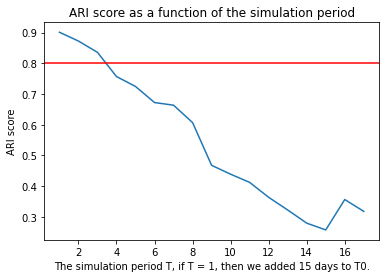

In [34]:
display_ARI_nb_days(simulation_results=simulation_results_exp_1, nb_days=nb_days_exp_1)

### 2) Experiment 2 : Simulation over 3 months
We take a period closer to the max purchase order date and run the simulation every 7 days.

In [35]:
#T=4 == one month before
nb_periods_exp_2 = 12 # 12 three before ago / tried 8 : two months ago
nb_days_exp_2 = 7

In [36]:
simulate_dataset(data, nb_days=nb_days_exp_2, nb_periods=nb_periods_exp_2, output_path=experiment_2_path, experiment_nb=2)




Step : 1 Maximum order purchase date : 2018-06-11 09:06:57
Verification of the filter : 2018-06-11 08:58:16
This dataset has 79092 unique clients



Step : 2 Maximum order purchase date : 2018-06-18 09:06:57
Verification of the filter : 2018-06-18 08:59:45
This dataset has 80547 unique clients



Step : 3 Maximum order purchase date : 2018-06-25 09:06:57
Verification of the filter : 2018-06-25 09:05:04
This dataset has 81949 unique clients



Step : 4 Maximum order purchase date : 2018-07-02 09:06:57
Verification of the filter : 2018-07-02 09:01:31
This dataset has 83297 unique clients



Step : 5 Maximum order purchase date : 2018-07-09 09:06:57
Verification of the filter : 2018-07-09 09:06:51
This dataset has 84460 unique clients



Step : 6 Maximum order purchase date : 2018-07-16 09:06:57
Verification of the filter : 2018-07-16 09:04:15
This dataset has 85421 unique clients



Step : 7 Maximum order purchase date : 2018-07-23 09:06:57
Verification of the filter : 2018-07-23 09:0

In [37]:
X_T0_exp_2 = pd.read_csv(experiment_2_path + "rfm_T0.csv").drop("customer_unique_id", axis=1).copy()

scaler_exp_2 = StandardScaler().fit(X_T0_exp_2[X_T0_exp_2.columns])

X_std_T0_exp_2 = X_T0_exp_2.copy()
X_std_T0_exp_2[X_std_T0_exp_2.columns] = scaler_exp_2.transform(X_std_T0_exp_2[X_std_T0_exp_2.columns])
print(X_std_T0_exp_2.shape)

(79092, 3)


In [38]:
# Saving clustering model
model = {'scaler_T0': scaler_exp_2}
filename = './model/simulation/experiment_{}/scaler_T0.pkl'.format("2")
with open(filename, "wb") as f: # wb writing
    pickle.dump(model, f)

In [39]:
kmeans_cls_T0_exp_2 = KMeans(n_clusters=nb_clusters, verbose=0, random_state=0)
kmeans_cls_T0_exp_2.fit(X_std_T0_exp_2)

KMeans(n_clusters=4, random_state=0)

In [40]:
simulation_results_exp_2 = pd.DataFrame({})
simulation_results_exp_2 = run_simulation(nb_periods=nb_periods_exp_2, kmeans_cls_T0=kmeans_cls_T0_exp_2, results=simulation_results_exp_2, experiment_nb=2, nb_clusters=nb_clusters)




For T = 1
(80547, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 1


,T,ARI
0,1,0.97422


,pred_0,pred_1,pred_2,pred_3
true_0,552,27496,0,5
true_1,0,0,2420,0
true_2,47821,0,0,0
true_3,0,0,0,2253





For T = 2
(81949, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 2


,T,ARI
0,1,0.974220
1,2,0.958896


,pred_0,pred_1,pred_2,pred_3
true_0,899,0,27916,7
true_1,0,2468,0,0
true_2,48382,0,0,0
true_3,1,0,0,2276





For T = 3
(83297, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 3


,T,ARI
0,1,0.974220
1,2,0.958896
2,3,0.926436


,pred_0,pred_1,pred_2,pred_3
true_0,1648,14,0,28146
true_1,0,0,2506,0
true_2,48681,0,0,0
true_3,5,2297,0,0





For T = 4
(84460, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 4


,T,ARI
0,1,0.974220
1,2,0.958896
2,3,0.926436
3,4,0.890263


,pred_0,pred_1,pred_2,pred_3
true_0,2518,0,28457,20
true_1,0,2539,0,0
true_2,48601,0,0,0
true_3,10,0,0,2315





For T = 5
(85421, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 5


,T,ARI
0,1,0.974220
1,2,0.958896
2,3,0.926436
3,4,0.890263
4,5,0.841963


,pred_0,pred_1,pred_2,pred_3
true_0,3707,0,28699,5
true_1,0,2572,0,0
true_2,48076,0,0,0
true_3,51,0,0,2311





For T = 6
(87030, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 6


,T,ARI
0,1,0.974220
1,2,0.958896
2,3,0.926436
3,4,0.890263
4,5,0.841963
5,6,0.743017


,pred_0,pred_1,pred_2,pred_3
true_0,29016,0,12,6377
true_1,0,2640,0,0
true_2,0,0,0,46582
true_3,0,0,2356,47





For T = 7
(88614, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 7


,T,ARI
0,1,0.974220
1,2,0.958896
2,3,0.926436
3,4,0.890263
4,5,0.841963
5,6,0.743017
6,7,0.698333


,pred_0,pred_1,pred_2,pred_3
true_0,29462,7596,0,0
true_1,0,0,2691,0
true_2,0,46425,0,0
true_3,92,202,0,2146





For T = 8
(90601, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 8


,T,ARI
0,1,0.974220
1,2,0.958896
2,3,0.926436
3,4,0.890263
4,5,0.841963
5,6,0.743017
6,7,0.698333
7,8,0.683730


,pred_0,pred_1,pred_2,pred_3
true_0,0,8198,0,30245
true_1,2752,0,0,0
true_2,0,46924,0,0
true_3,0,207,2190,85





For T = 9
(92516, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 9


,T,ARI
0,1,0.974220
1,2,0.958896
2,3,0.926436
3,4,0.890263
4,5,0.841963
5,6,0.743017
6,7,0.698333
7,8,0.683730
8,9,0.869203


,pred_0,pred_1,pred_2,pred_3
true_0,36357,3117,0,0
true_1,0,0,2799,1
true_2,0,47710,0,0
true_3,115,211,0,2206





For T = 10
(94311, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 10


,T,ARI
0,1,0.974220
1,2,0.958896
2,3,0.926436
3,4,0.890263
4,5,0.841963
5,6,0.743017
6,7,0.698333
7,8,0.683730
8,9,0.869203
9,10,0.880272


,pred_0,pred_1,pred_2,pred_3
true_0,37383,2881,0,0
true_1,0,0,1,2848
true_2,0,48622,0,0
true_3,125,211,2240,0





For T = 11
(95314, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 11


,T,ARI
0,1,0.974220
1,2,0.958896
2,3,0.926436
3,4,0.890263
4,5,0.841963
5,6,0.743017
6,7,0.698333
7,8,0.683730
8,9,0.869203
9,10,0.880272


,pred_0,pred_1,pred_2,pred_3
true_0,3171,38073,1,0
true_1,0,0,3,2878
true_2,48602,0,0,0
true_3,211,111,2264,0





For T = 12
(95420, 3)
We make a new clustering using that fits the new dataset.
KMeans(n_clusters=4, random_state=0)
We predict a clustering using the clustering at T0 for the new dataset.
ARI for T = 12


,T,ARI
0,1,0.974220
1,2,0.958896
2,3,0.926436
3,4,0.890263
4,5,0.841963
5,6,0.743017
6,7,0.698333
7,8,0.683730
8,9,0.869203
9,10,0.880272


,pred_0,pred_1,pred_2,pred_3
true_0,38283,4524,0,1
true_1,0,0,2883,3
true_2,0,47147,0,0
true_3,95,215,0,2269


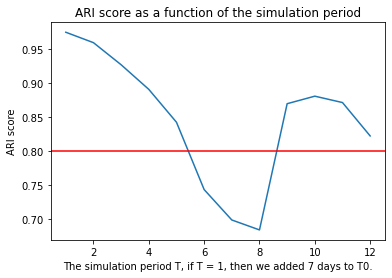

In [41]:
display_ARI_nb_days(simulation_results=simulation_results_exp_2, nb_days=nb_days_exp_2)

### 3) Conclusion

We did two simulations.

For the first simulation, we predicted the initial clustering in December 2017 soit 9 months before the end of the dataset.
We simulated the clustering prediction every 15 days.

After two months, we saw the ARI score decreased and get under 0.8.

So, for the second simulation, we predicted the initial clustering in June 2017 so three months before the end of the dataset.
We ran the simulation every week.

- NB : In fact, we tried a simulation two months (nb_periods = 8) prior to the end date of the dataset and a simulation three months before (nb_periods = 12). It was difficult to conclude with a simulation period of two months, so we used three months.

We saw that the ARI score decreases significantly at the 5th week.

Thus, we will recommend to our client that the maintenance should be done every month (every 4 or 5 weeks).


In [42]:
# End of simulation time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))

computing time : 449.496162 sec
computing time : 00:07:29
